# Table of Contents
 <p>

A little notebook to help visualise the official numbers for personal use. Absolutely no guarantees are made.

**This is not a replacement for expert advice. Please listen to your local health authorities.**

The data is dynamically loaded from: https://github.com/CSSEGISandData/COVID-19

In [17]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from jhu_helpers import *

In [6]:
jhu = aggregte_jhu_by_state(*get_jhu_data())

In [7]:
#jhu.confirmed.columns.tolist() # print a list of all countries in the data set

In [8]:
# look at recent numbers from highly affected countries
get_aggregate_top_n(jhu.confirmed)

Country/Region,China,Italy,Iran,Spain,Germany,US,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Austria,Belgium,Norway,Sweden,Denmark,Japan,Malaysia,Canada
Date,,,,,,,,,,,,,,,,,,,
2020-03-15,81003,24747,13938,7798,5795,3499,4523,8162,2200,1145,1138,860,886,1221,1022,875,839,428,252
2020-03-16,81033,27980,14991,9942,7272,4632,6668,8236,2200,1551,1416,1018,1058,1333,1103,933,825,566,415
2020-03-17,81058,31506,16169,11748,9257,6421,7699,8320,2700,1960,1711,1332,1243,1463,1190,1025,878,673,478
2020-03-18,81102,35713,17361,13910,12327,7783,9105,8413,3028,2642,2058,1646,1486,1550,1279,1116,889,790,657
2020-03-19,81156,41035,18407,17963,15320,13677,10947,8565,4075,2716,2467,2013,1795,1746,1439,1225,924,900,800


In [9]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    'Singapore', 
    'US',
    'France',
    'Germany',
]

In [ ]:
plt.close(1)
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, num=1)

jhu.confirmed[plot_countries].plot(ax=ax1[0,0], logy=True)
ax1[0,0].set_ylabel('Confirmed')

smooth_rate_d = 3
jhu.infection_rate[plot_countries].rolling(smooth_rate_d, center=True, min_periods=1).mean().plot(ax=ax1[1,0], logy=False)
ax1[1,0].set_ylabel('Infection Rate per Infected')

jhu.recovered[plot_countries].plot(ax=ax1[0,1], logy=True)
ax1[0,1].set_ylabel('Recovered')

jhu.deaths[plot_countries].plot(ax=ax1[1,1], logy=True)
ax1[1,1].set_ylabel('Deaths')

fig1.tight_layout()

In [ ]:
# save the above figure
#fig1.savefig('sars-covid-19_timeseries.png')

In [ ]:
## Scratch

In [ ]:
set(jhu.columns.get_level_values(0))

In [ ]:
# choose a random list of countries to plot
plot_countries = [
    'China',
    'Italy',
    #'Singapore', 
    'US',
    'France',
    'Germany',
]

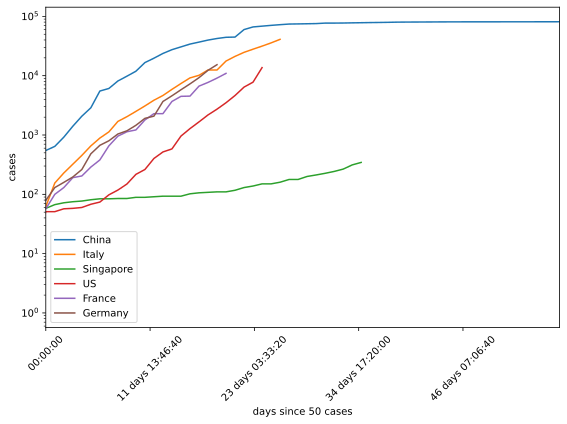

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
confirmed_thres = 50

for country in plot_countries:
    confirmed = jhu.confirmed[country]
    index_after_thres_cross = confirmed[confirmed>confirmed_thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

xmin, xmax = ax.get_xlim()
ax.set_xlim(0, xmax)

ax.set_xlabel('days since 50 cases')
ax.set_ylabel('cases')

fig.tight_layout()

fig.savefig('cases.pdf')

In [22]:
ax.get_xlim()

(-3283200000000000.0, 4924800000000000.0)

IndexError: index 0 is out of bounds for axis 0 with size 0

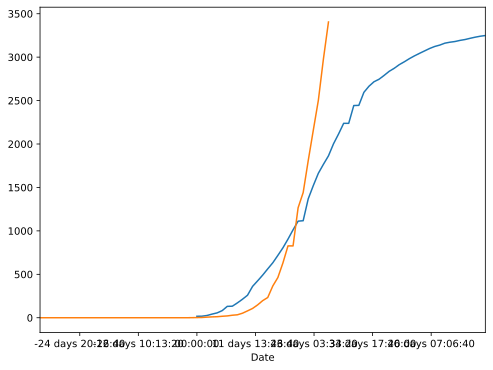

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
thres = 1

for country in plot_countries:
    confirmed = jhu.deaths[country]
    index_after_thres_cross = confirmed[confirmed>thres].index[0]
    confirmed_after_thres_exceed = confirmed.copy()
    confirmed_after_thres_exceed.index = confirmed.index - index_after_thres_cross
    confirmed_after_thres_exceed.plot(ax=ax, label=country)
ax.legend()
ax.xaxis.set_tick_params(rotation=45)
ax.set_yscale('log')

ax.set_xlabel('days since first death')
ax.set_ylabel('deaths')
fig.tight_layout()